# Wine Quality Prediction using linear regression



In [1]:
# importing required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Using Kaggle Dataset 

## Dataset Content


**Input variables (based on physicochemical tests):**

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

**Output variable (based on sensory data):**

12 - quality (score between 0 and 10) 


In [2]:
# loading the dataset to a Pandas DataFrame
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# # number of rows & columns in the dataset
df.shape

(1599, 12)

In [4]:
# # checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Analysis and Visulaization


In [5]:
# # statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


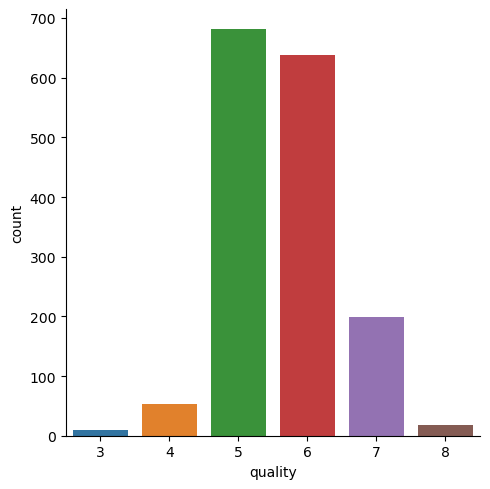

In [6]:
# number of values for each quality
sns.catplot(x='quality', data = df, kind = 'count')

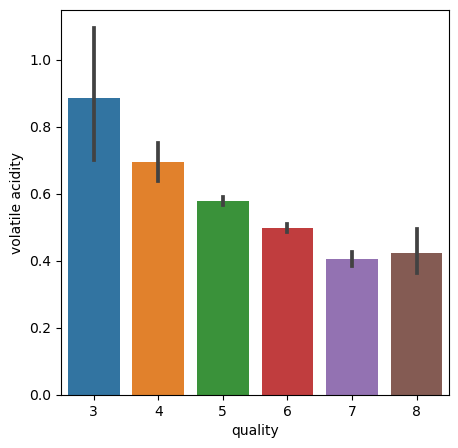

In [7]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)
plt.show()

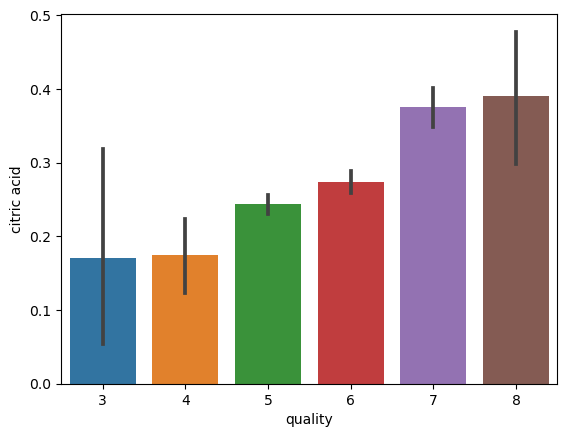

In [8]:
# citric acid vs Quality
plot = plt.figure()
sns.barplot(x='quality', y = 'citric acid', data = df)
plt.show()



# Correlation



In [9]:
correlation = df.corr()

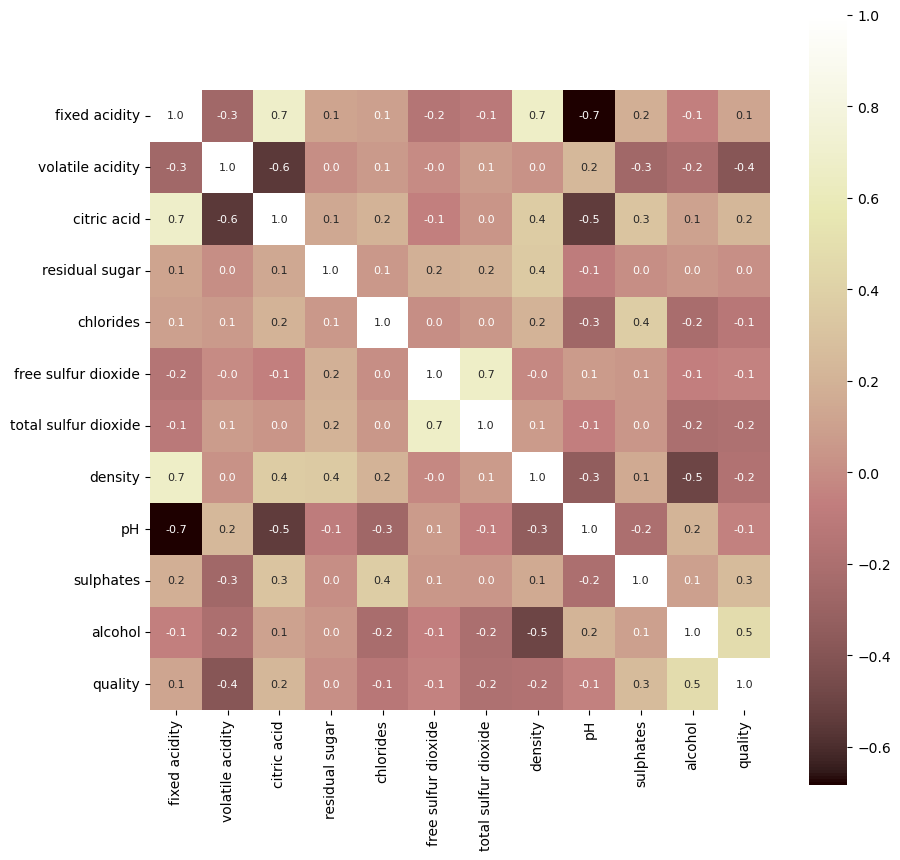

In [10]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'pink')
plt.show()

# Data Preprocessing

In [11]:
# separate the data and Label
X = df.drop('quality',axis=1)

In [12]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2




# Label Binarizaton


In [13]:
# if quality is greater than 7 then only we will consider it as good else bad
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

# Train & Test Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [15]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# Model Training:

In [16]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
model.coef_

array([ 3.82599382e-02, -1.72451012e-01,  1.21607472e-01,  3.11841975e-02,
       -6.75218942e-01, -2.82438201e-04, -8.31753076e-04, -3.92475224e+01,
        8.06682245e-02,  3.32728860e-01,  7.02569385e-02])

In [18]:

# there are no categorical variables. each feature is a number. Regression problem. 
# Given the set of values for features, we have to predict the quality of wine.
# finding correlation of each feature with our target variable - quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)




fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [19]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations



In [20]:

# taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']


['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [21]:
train_pred = model.predict(X_train)
train_pred

array([ 0.4740116 ,  0.15468028,  0.46915743, ...,  0.40468603,
        0.34653749, -0.0208075 ])

In [22]:
test_pred = model.predict(X_test)
test_pred

array([-0.09560148,  0.19960301,  0.24683863,  0.34350087, -0.05747799,
        0.01881005, -0.09550509,  0.30091623,  0.06536833,  0.21127088,
        0.10780436,  0.00446033, -0.01983855,  0.03071886,  0.37971071,
       -0.08887307,  0.23753451, -0.01801279,  0.3535462 ,  0.35743672,
        0.38326421,  0.16949441,  0.21010438, -0.09517037, -0.0677189 ,
        0.04387918,  0.00310493,  0.43164594,  0.30632356,  0.14227057,
        0.2801906 ,  0.37282185, -0.05209488,  0.17467759, -0.09395253,
        0.33968937,  0.53428231, -0.05693186,  0.02012572,  0.17467759,
        0.06561715, -0.08901275,  0.45171652,  0.04605819, -0.05369547,
        0.17453463,  0.1285484 , -0.04338293, -0.02268597,  0.05602666,
       -0.04183277,  0.2166169 ,  0.31349296,  0.37521671,  0.03696654,
        0.0071836 , -0.04449351, -0.05502287,  0.06089452, -0.04107168,
       -0.06745559,  0.07094587,  0.00168116,  0.11513983,  0.18761335,
        0.43980081,  0.05470548,  0.15170974, -0.00275327,  0.26

In [23]:

train_rmse = mean_squared_error(train_pred, Y_train) ** 0.5
train_rmse



0.30350535829801895

In [24]:
test_rmse = mean_squared_error(test_pred, Y_test) ** 0.5
test_rmse

0.2775480037885663

In [25]:


# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
predicted_data



array([-0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  1., -0.,  0.,
        0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,
        0.,  0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
       -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  1., -0.,
        0.,  0., -0.,  0.,  0.,  1., -0.,  0., -0.,  0., -0., -0.,  0.,
        0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
        0.,  0.,  1., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  1

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, test_pred)))



Mean Absolute Error: 0.19339477644845687
Mean Squared Error: 0.07703289440701802
Root Mean Squared Error: 0.2775480037885663


In [27]:
predictions = model.predict(X_test)
# predictions = np.round_(predictions)
result = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
result.head(20)



,Actual,Predicted
147,0,-0.095601
937,0,0.199603
877,0,0.246839
1000,1,0.343501
73,0,-0.057478
31,0,0.018810
266,0,-0.095505
1403,1,0.300916
263,0,0.065368
1491,0,0.211271


In [28]:
# when we create small input data 

input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')


if (predictions[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0.21354834]
Bad Quality Wine
Bad Quality Wine


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
